# Logistic Regression - Linear Classifier for Non-Linear Data


In the lecture we have shown that Logistic Regression is a **linear classifier**. Then, how does it classify non-linear data?

In this recitation you will train a Logistic Regression classifier on a non-linear dataset. The main questions that you will try to understand is: 
- How does a linear classifier define the decision boundary for non-linear data?
- Is the decision boundary on a non-linear data linear?

For a dataset that is not linearly separable you need to augment the feature matrix by adding higher order polynomial terms. The augmented feature space allows the model to create a linear separation of the classes (i.e., to create a linear decision boundary). By using contour plots of the decision boundary on a high-dimensional (feature augmented) dataset, you will be able to understand the "linear classification" of a non-linear dataset by the Logistic Regression model.

For better understanding you will create visualization of the decision boundary of your model.

To plot the decision boundary, you will use the the following two functions from "Logistic Regression-1-Binary Classification" notebook:
- decision_boundary_various_thresholds
- decision_boundary_class_colored

Please read the detailed notes on these two functions from the notebook.


### Scikit-Learn Logistic Regression Model

You will need to set the following two parameters to use the Scikit-Learn LogisticRegression model.
- solver
- C

For the solver, you may use the "liblinear" algorithm.

The strength of the regularization is controlled by the hyperparameter C. The higher the value of C, the less the model is regularized.


## Tasks
1. Train a linear model, evaluate train & test performance, plot decision boundary using two functions
2. Find the optimal polynomial model and train it, evaluate train & test performance, plot decision boundary using two functions

In [110]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


from sklearn.datasets.samples_generator import make_circles

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split

# Function for Plotting Decision Bounday 

Logistic Regression is a **linear classifier**. 

To better understand how Logistic Regression creates linear decision boundary, we need to **<font color=red size=6> visualize </font>** it.

We provide two techniques for plotting the class decision boundary for a multi-class classification problem.

1. Using Various Thresholds for a Class Probability 
2. Using Class Prediction 

The 1st technique is useful for understanding the decision boundaries at various thresholds. It reveals the scope of the solution space. We use the function "decision_boundary_various_thresholds" to plot this decision boundary

The 2nd technique is simple and easy to extend for non-linear dataset. We will use it more often. We use the function "decision_boundary_class_colored" to plot this decision boundary. Note that for multi-class classification, the "plotDistanceFromHyperplane" attribute should be set to False.

A detail discussion on these two functions are provided in the "Logistic Regression-1-Binary Classification" notebook.

In [111]:
def decision_boundary_various_thresholds(clf, X):
    
    # Get the min and max value of feature x1
    x1min, x1max = X[:,0].min() - 1, X[:, 0].max() + 1
    
    # Get the min and max value of feature x2
    x2min, x2max = X[:,1].min() - 1, X[:, 1].max() + 1
    
    # Create the mesh grid
    x1s = np.linspace(x1min, x1max, 100)
    x2s = np.linspace(x2min, x2max, 100)
    x1, x2 = np.meshgrid(x1s, x2s)

    # Create pairs of new points from the grid
    X_new = np.c_[x1.ravel(), x2.ravel()]

    # Compute the estimates for 2 classes for all new points
    y_proba = clf.predict_proba(X_new)

    
    # We only use the estimate for the class Iris-Virginica
    zz = y_proba[:, 1].reshape(x1.shape)

    # Generate the contour plot for the estimates of class 1
    contour = plt.contour(x1, x2, zz, cmap=plt.cm.brg)

    plt.clabel(contour, inline=1, fontsize=12)
    
    
def decision_boundary_class_colored(clf, X, plotDistanceFromHyperplane=False):
    
    # Get the min and max value of feature x1
    x1min, x1max = X[:,0].min() - 1, X[:, 0].max() + 1
    
    # Get the min and max value of feature x2
    x2min, x2max = X[:,1].min() - 1, X[:, 1].max() + 1
    
    # Create the mesh grid
    x1s = np.linspace(x1min, x1max, 100)
    x2s = np.linspace(x2min, x2max, 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    
    
    # Create pairs of new points from the grid
    X_new = np.c_[x1.ravel(), x2.ravel()]
    
    
    # Compute the class predictions for all new points
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    
    # Generate the contourf plot for the predictions
    plt.contourf(x1, x2, y_pred, cmap=plt.cm.bwr, alpha=0.2)
    
    
    if(plotDistanceFromHyperplane == True):
    
        # Compute the signed distance of a sample to the hyperplane for all new points
        y_decision = clf.decision_function(X_new).reshape(x1.shape)

        # Generate the contourf plot for the distance of all points from the hyperplane
        plt.contourf(x1, x2, y_decision, cmap=plt.cm.bwr, alpha=0.2)
    
    plt.colorbar()
    


# Synthetic Dataset

You will use the Scikit-Learn's "datasets.make_circles" function to generate a synthetic non-linear dataset that is suitable for investigating classification (as well as clustering) models. It provides better visualization of the classifier performance.


You will use the following two parameters of the make_circles function:

- factor : Scale factor between inner and outer circle. Range 0 ~ 1.

- noise : Standard deviation of Gaussian noise added to the data.

## Load The Data and Visualiize 

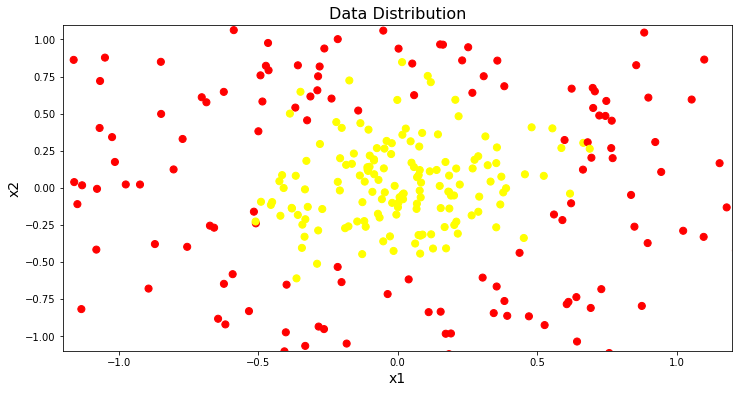

In [112]:
X, y = make_circles(300, factor=0.1, noise=0.25)

plt.figure(figsize=(12, 6))

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

plt.title("Data Distribution", fontsize=16)
plt.xlabel("x1", fontsize=14)
plt.ylabel("x2", fontsize=14)
plt.axis([-1.2, 1.2, -1.1, 1.1])
plt.show()

## Split Data into Train-Test Set

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Create A Scatter Plot of Train and Test Data  (10 pts)

On the same figure plot both the train and test data. 

To separately show the test data, use black "edgecolors" and slightly bigger marker size (using the "s" parameter).

More info on the parameters of matplotlib scatter plot.

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html

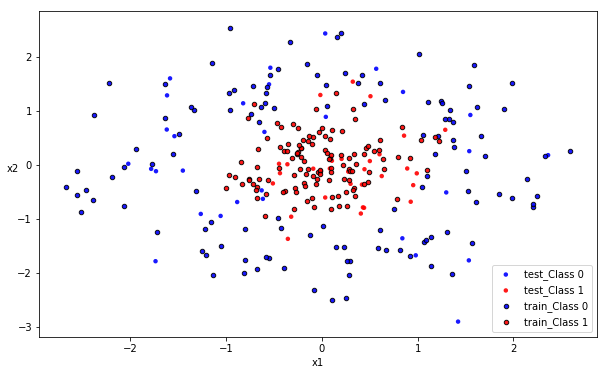

In [114]:
from sklearn.preprocessing import scale
X_test = scale(X_test)
X_train = scale(X_train)

X0_test = X_test[y_test==0]
X1_test = X_test[y_test==1]
X0_train = X_train[y_train==0]
X1_train = X_train[y_train==1]

fig = plt.figure(figsize=(10, 6))
plt.scatter(X0_test[:, 0], X0_test[:, 1],alpha=0.9, c="blue", edgecolors='none', s=20, label="test_Class 0")
plt.scatter(X1_test[:, 0], X1_test[:, 1],alpha=0.9, c="red", edgecolors='none', s=20, label="test_Class 1")
plt.scatter(X0_train[:, 0], X0_train[:, 1],alpha=0.9, c="blue", edgecolors='black', s=20, label="train_Class 0")
plt.scatter(X1_train[:, 0], X1_train[:, 1],alpha=0.9, c="red", edgecolors='black', s=20, label="train_Class 1")



plt.legend(loc=4)
plt.xlabel("x1")
plt.ylabel("x2", rotation=0)
plt.show()

## Task 1 (20 pts)

Train a linear model.

- Compute Training accuracy
- Plot the decision boundary using two functions (there should be two plots)
- Compute test accuracy, confusion matrix, precision, recall, f1 score and classification report

In [115]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [116]:
%%time
param_grid = {'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], 
              'tol': [1e-3, 1e-4], 'max_iter':[10000, 20000],'C': [1, 10, 50]}

lg_reg = LogisticRegression()

lg_reg_cv = GridSearchCV(lg_reg, param_grid, scoring='accuracy', cv=3)
lg_reg_cv.fit(X_train, y_train)

params_optimal = lg_reg_cv.best_params_

print("Best Score (accuracy): %f" % lg_reg_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal)

Best Score (accuracy): 0.479167
Optimal Hyperparameter Values:  {'C': 1, 'max_iter': 10000, 'solver': 'sag', 'tol': 0.001}
CPU times: user 693 ms, sys: 6.76 ms, total: 700 ms
Wall time: 371 ms


In [117]:
lg_reg_clf = LogisticRegression(**params_optimal)

lg_reg_clf.fit(X_train, y_train)

print("No. of Iterations:", lg_reg_clf.n_iter_ )
print("\nWeight Intercept:", lg_reg_clf.coef_ )
print("Weight Coefficients:", lg_reg_clf.coef_ )

No. of Iterations: [25]

Weight Intercept: [[-0.06872475  0.04952105]]
Weight Coefficients: [[-0.06872475  0.04952105]]


In [118]:
y_test_predicted = lg_reg_clf.predict(X_test)
#print(y_test_predict)

accuracy_score_test = np.mean(y_test_predicted == y_test)
print("\nAccuracy: ", accuracy_score_test)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))


precision_test = precision_score(y_test, y_test_predicted) 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, y_test_predicted)
print("Test Recall = %f" % recall_test)


f1_test = f1_score(y_test, y_test_predicted)
print("Test F1 Score = %f" % f1_test)


print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))


Accuracy:  0.266666666667

Test Confusion Matrix:
[[ 8 22]
 [22  8]]

Test Precision = 0.266667
Test Recall = 0.266667
Test F1 Score = 0.266667

Classification Report:
             precision    recall  f1-score   support

          0       0.27      0.27      0.27        30
          1       0.27      0.27      0.27        30

avg / total       0.27      0.27      0.27        60



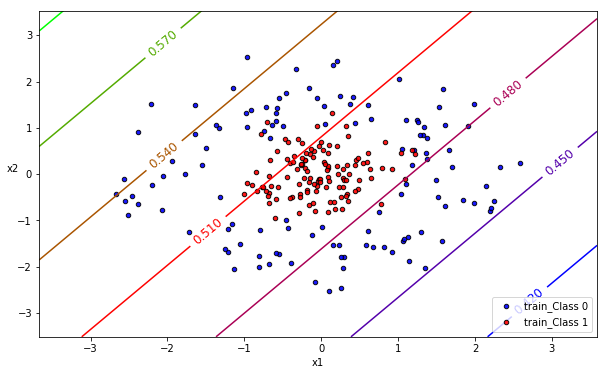

In [119]:

X_train = scale(X_train)

X0_train = X_train[y_train==0]
X1_train = X_train[y_train==1]


fig = plt.figure(figsize=(10, 6))
plt.scatter(X0_train[:, 0], X0_train[:, 1],alpha=0.9, c="blue", edgecolors='black', s=20, label="train_Class 0")
plt.scatter(X1_train[:, 0], X1_train[:, 1],alpha=0.9, c="red", edgecolors='black', s=20, label="train_Class 1")

# Contour plot representing class probabilities at various thresholds
decision_boundary_various_thresholds(lg_reg_clf, X_train)


plt.legend(loc=4)
plt.xlabel("x1")
plt.ylabel("x2", rotation=0)
plt.show()

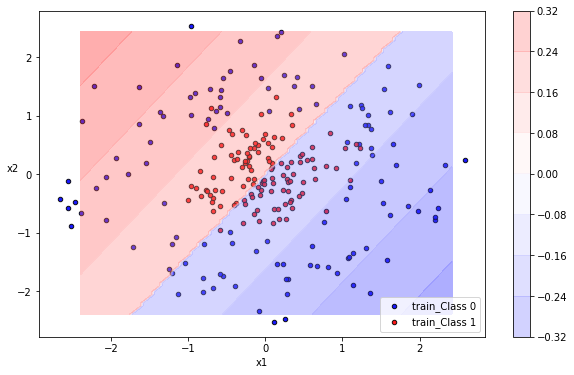

In [120]:

X_train = scale(X_train)

X0_train = X_train[y_train==0]
X1_train = X_train[y_train==1]


fig = plt.figure(figsize=(10, 6))
plt.scatter(X0_train[:, 0], X0_train[:, 1],alpha=0.9, c="blue", edgecolors='black', s=20, label="train_Class 0")
plt.scatter(X1_train[:, 0], X1_train[:, 1],alpha=0.9, c="red", edgecolors='black', s=20, label="train_Class 1")


decision_boundary_class_colored(lg_reg_clf, X, plotDistanceFromHyperplane=True)



plt.legend(loc=4)
plt.xlabel("x1")
plt.ylabel("x2", rotation=0)
plt.show()

## Task 2 (5 + 15  + 40 = 60)

- Choose the optimal polynomial model.

        -- Split the training data into training and validation fold (80%-20%). Vary the degree of the polynomial and train the Logistic Regression model using the training fold data. Then, compute the accuracy (use the "score" function) for the validation fold data using the models with varying degree. Finally, plot the accuracy values against the varying degree. From this plot find the optimal degree (that gives the highest validation fold accuracy).

- Train the optimal polynomial model
- Compute Training accuracy
- Plot the decision boundary using two functions (there should be two plots)
- Compute test accuracy, confusion matrix, precision, recall, f1 score and classification report




### Choose the Optimal Polynomial Model

You may vary the degree of the polynomial from 2 to 20.

Try the "liblinear" solver.

It is good to vary the hyperparameter "C" to see how it influences the test accuracy. For me "C=1" worked well.

#### Split Training data into Traing and Validation Fold (5 pts)

In [121]:
X_train_train, X_train_val, y_train_train, y_train_vel = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

#### Model Selection: Optimal Polynomial Degree (15 pts)

## Choose the Best Model (40 pts)

- Train the optimal polynomial model
- Compute Training accuracy
- Plot the decision boundary using two functions (there should be two plots)
- Compute test accuracy, confusion matrix, precision, recall, f1 score and classification report

## Choosing the Optimal Degree of the Polynomial


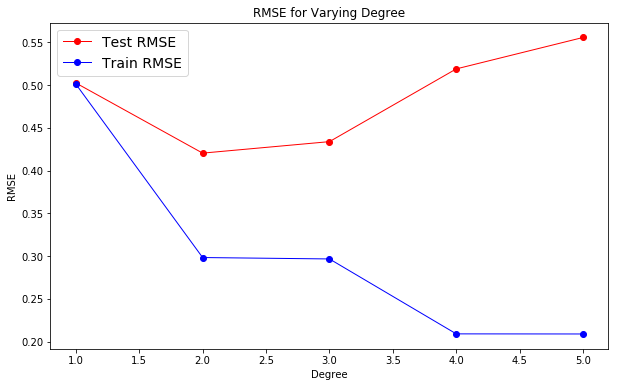

In [122]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degreeList = [1,2,3,4,5]

mse_train, mse_test = [], []

for degree in degreeList:

    model = make_pipeline(PolynomialFeatures(degree, include_bias=False), StandardScaler(), LinearRegression()) 
  
    model.fit(X_train_train, y_train_train)
       
    # Make prediction 
    y_train_predicted = model.predict(X_train)
    y_test_predicted = model.predict(X_test)
    
    
    mse_train.append(mean_squared_error(y_train, y_train_predicted))
    mse_test.append(mean_squared_error(y_test, y_test_predicted))
   

plt.figure(figsize=(10, 6))   
plt.plot(degreeList, np.sqrt(mse_test), "ro-", alpha=1.0, linewidth=1.0, label="Test RMSE")
plt.plot(degreeList, np.sqrt(mse_train), "bo-", alpha=1.0, linewidth=1.0, label="Train RMSE")    
plt.legend(loc="best", fontsize=14) 
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.title("RMSE for Varying Degree")
plt.show()

## Evaluate the Model Using Test Data


In [123]:
# Polynomial Regression

# Variable that speficies the degree of the polynomial to be added to the feature vector
poly_degree = 2


# Add polynomial terms with the feature vector using the sklearn PolynomialFeatures class
poly_features = PolynomialFeatures(degree=poly_degree, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)

print(X_train_poly.shape)

# Create linear regression object
# lin_reg_poly = LinearRegression()
log_reg_poly = LogisticRegression()

# Train the model
log_reg_poly.fit(X_train_poly, y_train)


print("\n----------------------------- Model Evaluation -----------------------------")

# Make prediction 
y_train_poly_predicted = log_reg_poly.predict(X_train_poly)


print("\nMean squared error: %.2f"
      % mean_squared_error(y_train, y_train_poly_predicted))


# Explained variance score: 1 is perfect prediction
print("Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" % r2_score(y_train, y_train_poly_predicted))

X_train_poly.shape

(240, 5)

----------------------------- Model Evaluation -----------------------------

Mean squared error: 0.04
Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.85


(240, 5)

In [142]:
%%time
param_grid = {'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], 
              'tol': [1e-3, 1e-4], 'max_iter':[10000, 20000],'C': [1, 10, 50]}

log_reg_poly = LogisticRegression()

log_reg_poly_cv = GridSearchCV(log_reg_poly, param_grid, scoring='accuracy', cv=3)
log_reg_poly_cv.fit(X_train, y_train)

params_optimal = log_reg_poly_cv.best_params_

print("Best Score (accuracy): %f" % log_reg_poly_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal)

log_reg_poly_clf = LogisticRegression(**params_optimal)
log_reg_poly_clf.fit(X_train_poly, y_train)

print("No. of Iterations:", log_reg_poly_clf.n_iter_ )
print("\nWeight Intercept:", log_reg_poly_clf.coef_ )
print("Weight Coefficients:", log_reg_poly_clf.coef_ )
print(X_train_poly.shape)

Best Score (accuracy): 0.479167
Optimal Hyperparameter Values:  {'C': 50, 'max_iter': 10000, 'solver': 'saga', 'tol': 0.001}
No. of Iterations: [116]

Weight Intercept: [[-0.49109611  0.75834215 -6.88302955  1.13905342 -7.45928985]]
Weight Coefficients: [[-0.49109611  0.75834215 -6.88302955  1.13905342 -7.45928985]]
(240, 5)
CPU times: user 767 ms, sys: 8.36 ms, total: 775 ms
Wall time: 437 ms


ValueError: X has 2 features per sample; expecting 5

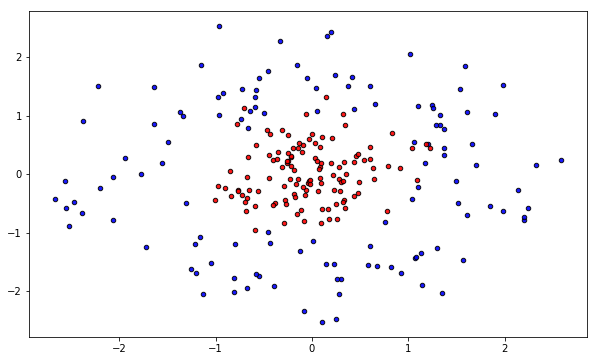

In [143]:
X_train_poly = scale(X_train_poly)
X0_train_poly = X_train_poly[y_train==0]
X1_train_poly = X_train_poly[y_train==1]

fig = plt.figure(figsize=(10, 6))
plt.scatter(X0_train_poly[:, 0], X0_train_poly[:, 1],alpha=0.9, c="blue", edgecolors='black', s=20, label="train_Class 0")
plt.scatter(X1_train_poly[:, 0], X1_train_poly[:, 1],alpha=0.9, c="red", edgecolors='black', s=20, label="train_Class 1")

# Contour plot representing class probabilities at various thresholds
decision_boundary_various_thresholds(log_reg_poly_clf, X_train_poly)


plt.legend(loc=4)
plt.xlabel("x1")
plt.ylabel("x2", rotation=0)
plt.show()

ValueError: X has 2 features per sample; expecting 5

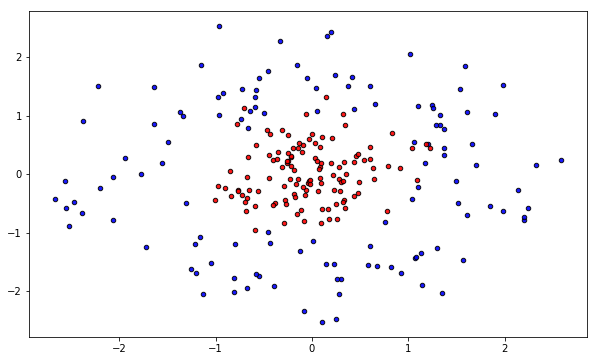

In [144]:
X_train_poly = scale(X_train_poly)
X0_train_poly = X_train_poly[y_train==0]
X1_train_poly = X_train_poly[y_train==1]


fig = plt.figure(figsize=(10, 6))
plt.scatter(X0_train_poly[:, 0], X0_train_poly[:, 1],alpha=0.9, c="blue", edgecolors='black', s=20, label="train_Class 0")
plt.scatter(X1_train_poly[:, 0], X1_train_poly[:, 1],alpha=0.9, c="red", edgecolors='black', s=20, label="train_Class 1")

decision_boundary_class_colored(log_reg_poly_clf, X_train_poly, plotDistanceFromHyperplane=True)


plt.legend(loc=4)
plt.xlabel("x1")
plt.ylabel("x2", rotation=0)
plt.show()

In [100]:
# Polynomial Regression

# Variable that speficies the degree of the polynomial to be added to the feature vector
poly_degree = 2


# Add polynomial terms with the feature vector using the sklearn PolynomialFeatures class
poly_features = PolynomialFeatures(degree=poly_degree, include_bias=False)
X_test_poly = poly_features.fit_transform(X_test)

print(X_test_poly.shape)

# Create linear regression object
# lin_reg_poly = LinearRegression()
log_reg_poly = LogisticRegression()

# Train the model
log_reg_poly.fit(X_test_poly, y_test)


y_test_poly_predicted = log_reg_poly.predict(X_test_poly)
#print(y_test_predict)


y_test_poly_predicted

(60, 5)


array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1])

In [101]:
accuracy_score_test = np.mean(y_test_poly_predicted == y_test)
print("\nAccuracy: ", accuracy_score_test)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_poly_predicted))


precision_test = precision_score(y_test, y_test_poly_predicted) 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, y_test_poly_predicted)
print("Test Recall = %f" % recall_test)


f1_test = f1_score(y_test, y_test_poly_predicted)
print("Test F1 Score = %f" % f1_test)


print("\nClassification Report:")
print(classification_report(y_test, y_test_poly_predicted))


Accuracy:  0.95

Test Confusion Matrix:
[[26  1]
 [ 2 31]]

Test Precision = 0.968750
Test Recall = 0.939394
Test F1 Score = 0.953846

Classification Report:
             precision    recall  f1-score   support

          0       0.93      0.96      0.95        27
          1       0.97      0.94      0.95        33

avg / total       0.95      0.95      0.95        60



# Observations (10 pts)

- Summarize your observations from the two tasks
- What type of decision boundary (linear/non-linear) is created by your polynomial model? Explain.

1. Using linear regression model, we have only 26.7% accuracy in prediction. However, by using polynomial regression model, we have 95% accuracy. This low accuracy using linear regression model was expected according to the dicision boundary polt. Apparently the dataset is non-linear. 

2. I used non-linear decision boundary since the dataset is apparently not linear.